# 函数拟合——Numpy版

Epoch 0, Loss: 13610.998341910949
Epoch 100, Loss: 291.95914271388585
Epoch 200, Loss: 169.64624448998515
Epoch 300, Loss: 115.79344377088204
Epoch 400, Loss: 87.48862906100983
Epoch 500, Loss: 70.67908904893112
Epoch 600, Loss: 153.92520582388144
Epoch 700, Loss: 133.8221214499941
Epoch 800, Loss: 91.69346919766211
Epoch 900, Loss: 79.84612582397415


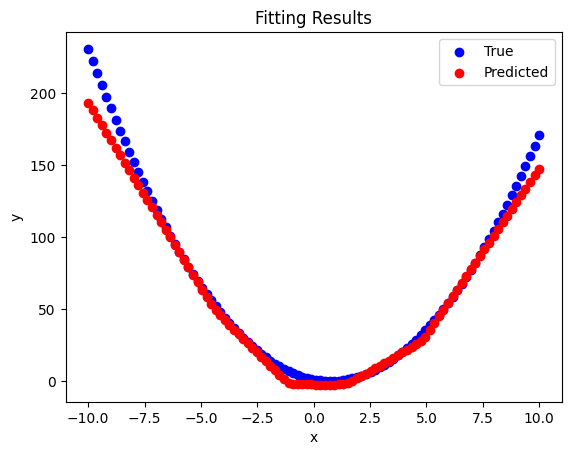

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def my_function(x):
    return 2 * x**2 - 3 * x + 1

# 定义ReLU激活函数
def relu(x):
    return np.maximum(x, 0)

# 定义神经网络模型类
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, x):
        self.h1 = np.dot(x, self.W1) + self.b1
        self.a1 = relu(self.h1)
        self.h2 = np.dot(self.a1, self.W2) + self.b2
        return self.h2
    
    def backward(self, x, y, learning_rate):
        m = x.shape[0]
        
        # 计算梯度
        grad_h2 = 2 * (self.h2 - y) / m
        grad_W2 = np.dot(self.a1.T, grad_h2)
        grad_b2 = np.sum(grad_h2, axis=0, keepdims=True)
        grad_a1 = np.dot(grad_h2, self.W2.T)
        grad_h1 = grad_a1 * (self.h1 > 0)
        grad_W1 = np.dot(x.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0, keepdims=True)
        
        # 参数更新
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2

# 生成训练集和测试集
np.random.seed(0)
x_train = np.random.uniform(-10, 10, size=(100, 1))
y_train = my_function(x_train) + np.random.normal(0, 2, size=(100, 1))

x_test = np.linspace(-10, 10, 100).reshape(-1, 1)
y_test = my_function(x_test)

# 定义神经网络模型
model = NeuralNetwork(input_size=1, hidden_size=32, output_size=1)

# 定义训练超参数
learning_rate = 0.001
epochs = 1000

# 训练模型
for epoch in range(epochs):
    # 前向传播
    y_pred = model.forward(x_train)
    
    # 计算训练集上的损失
    loss = np.mean(np.square(y_pred - y_train))
    
    # 反向传播并更新参数
    model.backward(x_train, y_train, learning_rate)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 在测试集上进行预测
y_pred_test = model.forward(x_test)

# 绘制拟合结果
plt.scatter(x_test, y_test, color='blue', label='True')
plt.scatter(x_test, y_pred_test, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Results')
plt.show()


在这个实现中，我们首先定义了函数 my_function 作为我们要拟合的目标函数，并生成了训练集和测试集。然后，我们定义了一个神经网络模型类 NeuralNetwork，其中包括了前向传播和反向传播的方法。我们使用随机梯度下降来训练模型，并在测试集上评估了模型的性能。最后，我们绘制了模型在测试集上的拟合结果。